# Prévalence du Listeria dans le lait cru

In [1]:
!ls

README.md                 listeria.txt              projets2021.pdf
exploratoire_claire.ipynb mcmc.ipynb


In [637]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as rd
import statistics as stats
import math
from math import gamma
from tqdm import tqdm
import scipy.stats

# Exploration rapide des données

In [627]:
data = pd.read_csv('listeria.txt', sep=',')
data.columns = ['nb_pos', 'nb_test']
new_row = {'nb_pos':0, 'nb_test':600}
data = data.append(new_row, ignore_index=True)
data['prob']=data["nb_pos"]/data['nb_test']
proba_constante = sum(data['nb_pos'])/sum(data['nb_test'])

- data.nb_pos[i] : nombre de personnes testées positives sur l'échantillon i
- data.nb_test[i]: nombre de personnes testées dans l'échantillon i
- data.prob[i]: probabilité empirique d'être positif sur l'étude i
- proba_constante: probabilité empirique d'être positif

In [3]:
# distribution du nombre de testés dans chaque étude

data['nb_test'].sort_values()

86         14
87         16
83         16
85         17
17         20
       ...   
40       1720
62       2009
44       2511
20       4046
18    1227053
Name: nb_test, Length: 91, dtype: int64

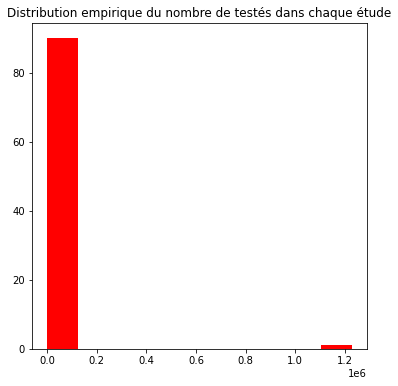

In [19]:
dg=data['nb_test']
plt.figure(figsize=(6,6))
plt.hist(dg, density=False,color="red")
plt.title("Distribution empirique du nombre de testés dans chaque étude")
plt.show()

On voit qu'une étude se distingue clairement des autres de par son ampleur. Il s'agit de l'étude 18 qui concerne 1 227 053 personnes !

In [20]:
# distribution du nombre de positifs dans chaque étude

data['nb_pos'].sort_values()

0       0
17      0
16      0
15      0
14      0
     ... 
44     79
69     85
79     90
62    102
18    278
Name: nb_pos, Length: 91, dtype: int64

Le nombre de positifs a l'air lui plus homogène entre chaque étude. Le plus grand nombre de positifs est pour l'étude 18 (assez cohérent car c'est elle qui a testé le plus de personnes). A priori donc, aucune raison d'enlever cette étude de nos données.

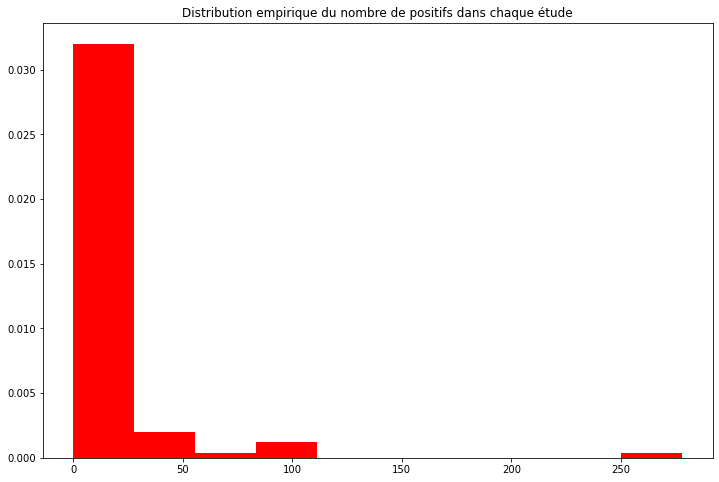

In [9]:
# distribution du nombre de positifs dans chaque étude

dg=data['nb_pos']
plt.figure(figsize=(12,8))
plt.hist(dg, density=True,color="red")
plt.title("Distribution empirique du nombre de positifs dans chaque étude")
plt.show()

In [25]:
# le plus important : distribution empirique de probabilité de positivité dans chaque étude

data['prob'].sort_values()

0     0.000000
17    0.000000
16    0.000000
15    0.000000
14    0.000000
        ...   
85    0.294118
86    0.428571
87    0.437500
88    0.452632
89    0.809524
Name: prob, Length: 91, dtype: float64

L'étude 89 affiche une probabilité empirique assez élevée, de presque $0.81$. On voit clairement que cette probabilité est supérieure à toutes les autres : 

Text(0.5, 1.0, 'Distribution des probas a priori empiriques')

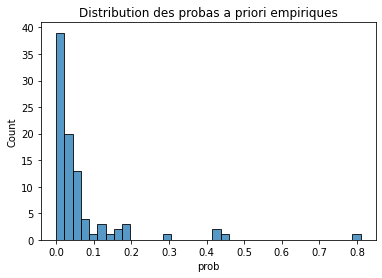

In [26]:
sns.histplot(data['prob'])
plt.title("Distribution des probas a priori empiriques")

Il faudra peut-être songer à l'enlever des données...

In [45]:
proba_constante

0.0010564383073439964

# Question 1 : détermination de la loi a posteriori

On suppose dans un premier temps que la probabilité de présence de listeria dans toutes les études est constante $p$.


Modèle binomial : $r_i \sim \mathcal{B}(n_i,p)$, de fonction de masse $f(r_i, p) = \binom{n_i}{r_i} p^{r_i} (1-p)^{n_i-r_i}$ 

Loi a priori : $p \sim \mathcal{B}eta(\alpha,\beta)$ avec $\alpha, \beta = 1$ ce qui revient à avoir $p \propto \mathcal{U}([0,1])$ donc de densité $\mathbb{1}_{[0,1]}(p)$

La densité de la loi a posteriori est alors ($n$=91 est le nombre d'études) : 

$\pi(p|r_1,\dots, r_n) \propto \prod_{i=1}^{n}f(r_i,p) \mathbb{1}_{[0,1]}(p) 
\\  \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,  \propto \prod_{i=1}^{n} p^{r_i} (1-p)^{(n_i-r_i)}\mathbb{1}_{[0,1]}(p)   \\  \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,  \propto p^{\sum_{i=1}^{n}r_i} (1-p)^{\sum_{i=1}^{n}(n_i-r_i)}\mathbb{1}_{[0,1]}(p)   \sim \mathcal{B}eta(\sum_{i=1}^{n}r_i +1, \sum_{i=1}^{n}(n_i-r_i)+1)$

Les observations nous permettent alors de calculer les deux paramètres de cette loi Bêta :


In [628]:
print("premier paramètre =",sum(data['nb_pos'])+1)
print("deuxième paramètre =",sum(data['nb_test'])-sum(data['nb_pos'])+1)

premier paramètre = 1329
deuxième paramètre = 1255727


Finalement, la loi a posteriori de $p$ est une $\boxed{\mathcal{B}eta(1329,1255727)}$

On peut utiliser la fonction beta disponible dans le module random de Python.

##### intermède : on a aussi  créer notre propre fonction qui simule une loi beta, à partir d'une uniforme : 

### Loi exponentielle 



In [631]:
def gen_exp(theta):
    u = rd.random()
    return -1/theta*np.log(1-u)

### Loi gamma

------------
Soient $X$ et $Y$ deux variables independantes distribuees suivant des lois  $\Gamma(a,1)$ et $\Gamma(b,1)$

Alors $U = X+Y$ et $V = X/(X+Y)$ sont deux variables independantes distribuees suivant des lois $\Gamma(a+b,1)$ et $\mathcal{B}eta(a,b)$.





In [632]:
def gama(x):
    l = [gen_exp(x) for i in range(10000)]
    return mean(l)
        
def f(x, a, b):
    return b**a*x**(a-1)*exp(-bx)/gamma(a)

In [633]:
def gen_gamma(a,b):
    # si alpha = 1, cela revient à avoir une loi exponentielle de paramètre beta
    if a == 1:
        return gen_exp(b)
    # si alpha est un entier non nul, gamma coïncide avec une somme de alpha va exponentielles
    # de paramètre beta indépendantes
    elif a == int(a) and a > 1 : 
        return sum([gen_exp(b) for i in range(a)])
    # sinon, on va utiliser une méthode de rejet 
    else : 
        while True : 
            # on va utiliser une loi de gamma de paramètres entiers pour g
            x = gen_gamma(int(a), b+1)
            # constante calculée dans la photo sur messenger
            c = b**a/((b+1)**int(a))*gama(int(a))/gama(a)*(a-int(a))**(a-int(a))*exp(-int(a)+a)
            u = rd.random()
            if u <= c*f(x, a, b)/g(x, int(a), b+1):
                return x 
        
        

### Loi Beta

In [634]:
def gen_beta(alpha, beta):
    X = gen_gamma(alpha, 1)
    Y = gen_gamma(beta,1)
    return X/(X+Y)

##### Fin Intermède

In [639]:
data_wo = data[data.nb_test <=1.2e+06]
data_wo.nb_test.describe()
#print(len(data[data.nb_test >1.2e+06]))



count      90.000000
mean      333.344444
std       575.923180
min        14.000000
25%        80.000000
50%       135.500000
75%       332.000000
max      4046.000000
Name: nb_test, dtype: float64

In [640]:
# on génère  notre beta(1329,1255727)
distr = [scipy.stats.beta.rvs(1329,1255727) for i in tqdm(range(100000))]





  0%|          | 0/100000 [00:00<?, ?it/s]


  1%|          | 982/100000 [00:00<00:10, 9817.83it/s]


  2%|▏         | 1929/100000 [00:00<00:10, 9709.60it/s]


  3%|▎         | 3023/100000 [00:00<00:09, 10046.42it/s]


  4%|▍         | 4124/100000 [00:00<00:09, 10315.05it/s]


  5%|▌         | 5145/100000 [00:00<00:09, 10280.72it/s]


  6%|▌         | 6176/100000 [00:00<00:09, 10287.36it/s]


  7%|▋         | 7233/100000 [00:00<00:08, 10368.71it/s]


  8%|▊         | 8282/100000 [00:00<00:08, 10403.86it/s]


  9%|▉         | 9355/100000 [00:00<00:08, 10498.83it/s]


 10%|█         | 10442/100000 [00:01<00:08, 10606.52it/s]


 12%|█▏        | 11520/100000 [00:01<00:08, 10656.42it/s]


 13%|█▎        | 12601/100000 [00:01<00:08, 10701.55it/s]


 14%|█▎        | 13659/100000 [00:01<00:08, 10321.09it/s]


 15%|█▍        | 14751/100000 [00:01<00:08, 10492.85it/s]


 16%|█▌        | 15845/100000 [00:01<00:07, 10623.04it/s]


 17%|█▋        | 16906/100000 [00:01<00:07, 10542.72it/s]


 18%

In [27]:
# probabiliré agrégeé dans nos données, qu'on va comparer avec la distribution de notre loi a posteriori

proba_constante = sum(data['nb_pos'])/sum(data['nb_test'])
proba_constante

0.0010564383073439964

  2%|▏         | 8/500 [05:55<6:04:26, 44.44s/it]
/home/guillot/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
  0%|          | 0/500 [06:54<?, ?it/s]


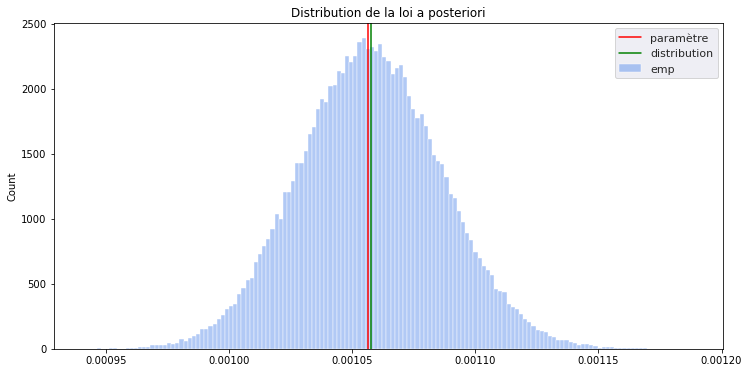

In [641]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set(style="darkgrid")
plt.axvline(proba_constante, color='red', label='paramètre')
sns.histplot(distr, kde = True, color='cornflowerblue', label='etudes')
p_esp = sum(distr)/len(distr)
plt.axvline(p_esp, color="green", label='espérance de la distribution')
plt.title("Distribution de la loi a posteriori")
plt.legend(['paramètre', 'distribution', "emp",'espérance'])

Le modèle approche asssez bien la probabilité agrégée de la présence de listeria (c'est-à-dire celle prise en agrégant l'ensemble des études).
Néanmoins, on a vu que les études affichent des probabilités empiriques de présence de listeria assez variées. Il paraît donc plus judicieux de considérer des probabilités de présence de listeria $p_i$ qui varient avec l'étude $i$.$\newline$Ce sera l'objet de la deuxième question.

In [642]:
l_pos = data['nb_pos'][data.nb_pos >0].tolist()
l_test= data['nb_test'][data.nb_pos > 0].tolist()
ech = [scipy.stats.beta.rvs(l_pos[i],l_test[i]) for i in range(len(l_test))]

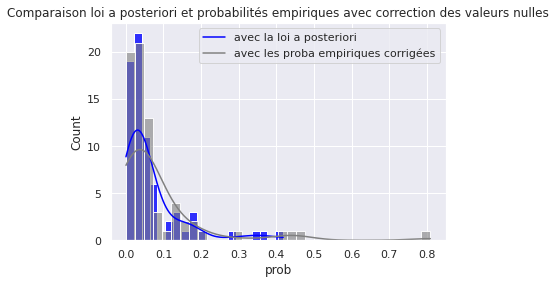

In [643]:
plt.title('Comparaison loi a posteriori et probabilités empiriques avec correction des valeurs nulles')
sns.histplot(ech, color="blue", kde=True, alpha=0.8)
sns.histplot(data['prob'][data.nb_pos > 0], color="grey", kde=True,alpha=0.6)
plt.legend(['avec la loi a posteriori', 'avec les proba empiriques corrigées'])



## Question 2 : 

On suppose dans un second temps que la probabilité de présence de listeria est variable selon les études.  

Modèle binomial : $r_i \sim \mathcal{B}(n_i,p_i)$, de fonction de masse $f(r_i, p_i) = \binom{n_i}{r_i} p_i^{r_i} (1-p_i)^{n_i-r_i}$

Loi a priori : $ \forall i, p_i \sim \mathcal{B}eta(\alpha,\beta)$, de densité $\displaystyle{\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}}p_i^{\alpha-1}(1-p_i)^{\beta-1}\mathbb{1}_{[0,1]}(p_i)$

L'énoncé propose la reparamétrisation suivante : $\mu = \alpha/(\alpha+\beta) \sim \mathcal{U}([0,1])$ et $\kappa = \alpha + \beta \sim \mathcal{E}(0.1)$

On supposera que : $\textbf{$\kappa$ et $\mu$ sont indépendantes}$ 

Donc on aura la densité jointe de $(\mu,\kappa)$ suivante : $p(\mu,\kappa)$ = $0.1 e^{-0.1\kappa}\mathbb{1}_{[0 ; \infty[}(\kappa)\mathbb{1}_{[0,1]}(\mu)$
     
En inversant : $\alpha = \kappa \mu $ et $\beta = \kappa (1-\mu)$

Et donc $p_i$ a pour densité (sachant $\mu$ et $\kappa$) : $p(p_i|\mu,\kappa)$  = $\displaystyle{\frac{\Gamma(\kappa)}{\Gamma(\kappa \mu)\Gamma(\kappa (1-\mu))}}p_i^{\kappa \mu-1}(1-p_i)^{\kappa(1-\mu)-1}\mathbb{1}_{[0,1]}(p_i)$

La densité de la loi a posteriori est alors : 

$\pi(\mu,\kappa,p_1,...,p_n|r_1,\dots, r_n) \propto \left(\prod_{i=1}^{n}f(r_i,p_i)p(p_i|\mu,\kappa)\right)p(\mu,\kappa)
\\    \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,  \propto \left(\prod_{i=1}^{n} p_i^{r_i} (1-p_i)^{(n_i-r_i)}\displaystyle{\frac{\Gamma(\kappa)}{\Gamma(\kappa \mu)\Gamma(\kappa (1-\mu))}}p_i^{\kappa \mu-1}(1-p_i)^{\kappa(1-\mu)-1}\mathbb{1}_{[0,1]}(p_i)\right)e^{-0.1\kappa}\mathbb{1}_{[0 ; \infty[}(\kappa)\mathbb{1}_{[0,1]}(\mu)  
\\    \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\,\,  \propto e^{-0.1\kappa}\left(\displaystyle{\frac{\Gamma(\kappa)}{\Gamma(\kappa \mu)\Gamma(\kappa (1-\mu))}}\right)^n\left(\prod_{i=1}^{n} p_i^{r_i+\kappa \mu -1} (1-p_i)^{(n_i-r_i)+\kappa(1-\mu)-1}\mathbb{1}_{[0,1]}(p_i)\right)\mathbb{1}_{[0 ; \infty[}(\kappa)\mathbb{1}_{[0,1]}(\mu)$ 

Contrairement au cas précédent, la loi a posteriori ne correspond pas à une loi usuelle connue. 
On va alors mettre en oeuvre un algorithme de $\textbf{Metropolis within Gibbs}$ pour simuler cette loi a posteriori, en s'appuyant sur les différentes lois (connues) de nos paramètres $(p_i)_i,\kappa$ et $\mu$.

In [644]:
def indicatrice1(x):
    if x <1 and x>0:
        return 1
    else:
        return 0

def indicatrice2(x):
    if x >=0:
        return 1
    else:
        return 0


In [67]:
def metropolis_within_gibbs(x,sigma_1,sigma_2):
    mu=x[91]      # valeur précédente de mu
    kap=x[92]     # valeur précédente de kappa
    
    y=np.zeros(93)  #initialisation d'un vecteur y qui contiendra les valeurs à l'étape suivante
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = mu + sigma_1 * np.random.randn()       # proposition pour la prochaine valeur de mu 
    
    if indicatrice1(z)==0:
        seuil=0
    else:
        quantite_1=((1/gamma(kap*z))*(1/gamma(kap*(1-z))))**91
        quantite_2=((1/gamma(kap*mu))*(1/gamma(kap*(1-mu))))**91
        quantite_3=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(kap*(z-mu))
        seuil=min(1,(quantite_1*quantite_3)/quantite_2)
                                                                   
    if np.random.rand() < seuil:             # on accepte z comme nouvelle valeur de mu
        y[91]=z
    
    else:
        y[91]=mu                             # on garde l'ancienne valeur de mu
    
    
    w = kap + sigma_2 * np.random.randn()         # proposition pour la prochaine valeur de kappa
    
    if indicatrice2(w)==0:
        seuil=0
    else:
        quantite_1=np.exp(-0.1*(w-kap))
        quantite_2=((gamma(w)/gamma(w*y[91]))*(1/gamma(w*(1-y[91]))))**91
        quantite_3=((gamma(kap)/gamma(kap*y[91]))*(1/gamma(kap*(1-y[91]))))**91
        quantite_4=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(y[91]*(w-kap))
        quantite_5=(math.prod([(1-y[i]) for i in range(0,91)]))**(w-kap)
        seuil=min(1,(quantite_1*quantite_2*quantite_4*quantite_5)/quantite_3)
        
    if np.random.rand() < seuil:             # on accepte w comme nouvelle valeur de kappa
        y[92]=w
    
    else:
        y[92]=kap                            # on garde l'ancienne valeur de kappa  

    
    return y      # on retourne le vecteur des nouvelles valeurs

In [68]:
# initialisation de notre vecteur y qui contiendra les valeurs successives de nos 93 paramètres (les 91 p_i + mu + kappa)

N = 10000
y = np.zeros((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]           # on prend les probas empiriques comme probas initiales
    
y[0,91]=0.5         # valeur initiale pour mu car mu suit une uniforme sur [0,1]
y[0,92]=10          # valeur initiale pour kappa car kappa suit une exp(0.1) donc est de moyenne 10


# generate chain

for n in tqdm(range(1, 10000)):
    y[n] = metropolis_within_gibbs(y[n-1],sigma_1=0.3,sigma_2=0.5)

  2%|▏         | 169/9999 [00:01<02:55, 56.10it/s]<ipython-input-67-c4e8369fe25e>:20: RuntimeWarning: invalid value encountered in double_scalars
  seuil=min(1,(quantite_1*quantite_3)/quantite_2)
  8%|▊         | 782/9999 [00:04<00:47, 195.34it/s]<ipython-input-67-c4e8369fe25e>:19: RuntimeWarning: overflow encountered in double_scalars
  quantite_3=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(kap*(z-mu))
<ipython-input-67-c4e8369fe25e>:37: RuntimeWarning: divide by zero encountered in double_scalars
  quantite_4=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(y[91]*(w-kap))
 21%|██▏       | 2131/9999 [00:11<00:37, 207.17it/s]<ipython-input-67-c4e8369fe25e>:20: RuntimeWarning: divide by zero encountered in double_scalars
  seuil=min(1,(quantite_1*quantite_3)/quantite_2)
100%|██████████| 9999/9999 [00:53<00:00, 186.96it/s]


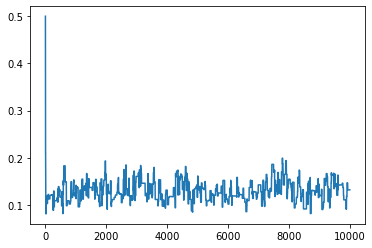

In [203]:
plt.plot(y[:,91])

# MCMC trace pour mu

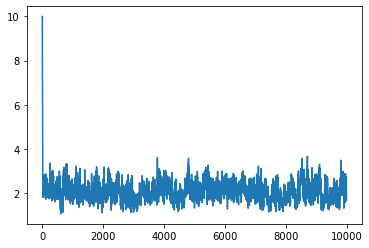

In [204]:
plt.plot(y[:,92])

# MCMC trace pour kappa

Problème : on souhaite augmenter les valeurs de sigma_1 et sigma_2 (par exemple à 0.3 et 10) mais quand on le fait, il y a une erreur numérique (le calcul d'une quantité mobilise trop de place). Illustration : 

In [205]:
# réinitialisation de y

N = 1000
y = np.empty((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]
y[0,91]=0.5
y[0,92]=10


for n in tqdm(range(1, 1000)):
    y[n] = metropolis_within_gibbs(y[n-1],sigma_1=0.3,sigma_2=10)

  0%|          | 0/999 [00:00<?, ?it/s]<ipython-input-201-fbf65cd40e52>:39: RuntimeWarning: overflow encountered in double_scalars
  seuil=min(1,(quantite_1*quantite_2*quantite_4*quantite_5)/quantite_3)
<ipython-input-201-fbf65cd40e52>:37: RuntimeWarning: overflow encountered in double_scalars
  quantite_4=(math.prod([y[i]/(1-y[i]) for i in range(0,91)]))**(y[91]*(w-kap))
  0%|          | 3/999 [00:00<00:05, 175.02it/s]


OverflowError: (34, 'Numerical result out of range')

Solution : reprogrammer la fonction gamma de Python car celle-ci tient trop de place + passer l'évaluation des seuils en log. De cette façon, il n'y a plus d'erreurs générées par notre code, et on peut faire varier à souhait les varianes

In [174]:
def gammar(x):
    if x>1:
        return (x-1)*gammar(x-1)
    else:
        return gamma(x)

In [645]:
def metropolis_within_gibbs_bis(x,sigma_1,sigma_2):
    mu=x[91]      # valeur précédente de mu
    kap=x[92]     # valeur précédente de kappa
    
    y=np.zeros(93)  #initialisation d'un vecteur y qui contiendra les valeurs à l'étape suivante
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = mu + sigma_1 * np.random.randn()       # proposition pour la prochaine valeur de mu 
    
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap*z)*gammar(kap*(1-z)))
        quantite_2=-91*np.log(gammar(kap*mu)*gammar(kap*(1-mu)))
        quantite_3=(kap*(z-mu))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:             # on accepte z comme nouvelle valeur de mu
        y[91]=z
    
    else:
        y[91]=mu                             # on garde l'ancienne valeur de mu
    
    
    w = kap + sigma_2 * np.random.randn()         # proposition pour la prochaine valeur de kappa
    
    if indicatrice2(w)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(w-kap)
        quantite_2=91*np.log(gammar(w)/(gammar(w*y[91])*gammar(w*(1-y[91]))))
        quantite_3=91*np.log(gammar(kap)/(gammar(kap*y[91])*gammar(kap*(1-y[91]))))
        quantite_4=(y[91]*(w-kap))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        quantite_5=(w-kap)*(sum([np.log(1-y[i]) for i in range(0,91)]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             # on accepte w comme nouvelle valeur de kappa
        y[92]=w
    
    else:
        y[92]=kap                            # on garde l'ancienne valeur de kappa  

    
    return y      # on retourne le vecteur des nouvelles valeurs

In [61]:
# réinitialisation de notre vecteur y 

N = 10000
y = np.zeros((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]
y[0,91]=0.5
y[0,92]=10


for n in tqdm(range(1, 10000)):
    y[n] = metropolis_within_gibbs_bis(y[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [01:01<00:00, 161.82it/s]


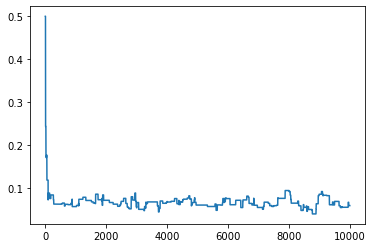

In [62]:
plt.plot(y[:,91])

# MCMC trace pour mu

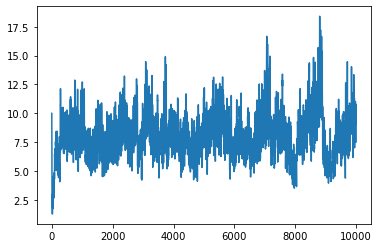

In [63]:
plt.plot(y[:,92])

# MCMC trace pour kappa

Résultats : à partir de la 50ème itération, l'algo semble converger.


Pour être sûr de se situer dans la zone de convergence, on va considérer que la zone de burn-in est la plage [0;2000]

### Caractérisation des lois a posteriori de mu et kappa

<AxesSubplot:ylabel='Count'>

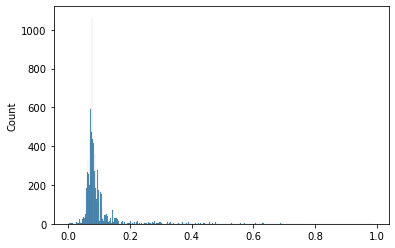

In [98]:
# mu

sns.histplot((y[2000:,91]))

On obtient une distribution symétrique autour de la moyenne, qui peut ressembler à la distribution d'une loi normale, avec cependant un pic important à la moyenne

Si c'était une loi normale, quels en seraient les paramètres ?

In [114]:
moy=np.mean(y[2000:,91])
e_type=np.std(y[2000:,91])

print("moyenne=",moy)
print("écart-type=",e_type)

moyenne= 0.09574601832482028
écart-type= 0.06945272228164598


Est-ce vraisemblable de penser que la loi de $\mu$ est une $\mathcal{N}(0.096,0.069²)$ ?

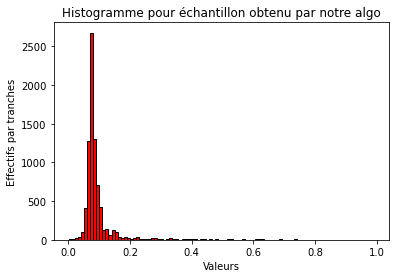

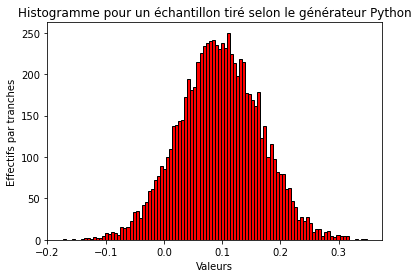

In [103]:
# Visualisation de l'adéquation à la loi normale :

X=y[2000:,91]
plt.hist(X, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title('Histogramme pour échantillon obtenu par notre algo')
plt.show()

Y=[np.random.normal(moy,e_type) for i in range(2000,10000)]
plt.hist(Y, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title("Histogramme pour un échantillon tiré selon le générateur Python")
plt.show()

Il ne s'agit pas d'une loi normale. Les distributions entre les deux échantillons diffèrent

In [106]:
# Test de Kolmogorov-Smirnov

import scipy.stats as statis

X=y[2000:,91]
Y=[np.random.normal(moy,e_type) for i in range(2000,10000)]
D1,p1=statis.kstest(X, 'norm', (moy,e_type))
D2,p2=statis.kstest(Y, 'norm', (moy,e_type))

print("D1=",D1)
print("p-valeur_1=",p1)
print("D2=",D2)
print("p-valeur_2=",p2)

D1= 0.2959104108726288
p-valeur_1= 0.0
D2= 0.006517738803456852
p-valeur_2= 0.8837291642661295


Le test de KS rejette bien l'hypothèse selon laquelle mu suit une loi normale

Et une loi beta ?

In [135]:
moy1=np.mean(y[2000:,91])
e_type1=np.std(y[2000:,91])
var1=np.var(y[2000:,91])

#estimation des paramètres par la méthode des moments

a=moy1*(moy1-moy1**2-var1)/var1
b=(moy1-2*(moy1**2)+moy1**3-var1+moy1*var1)/var1

print("alpha=",a)
print("beta=",b)

alpha= 1.622768987272054
beta= 15.325914787407514


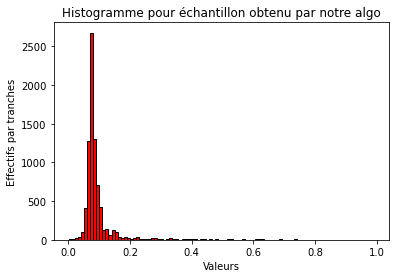

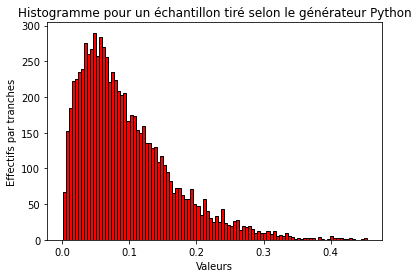

In [116]:
# Visualisation de l'adéquation à la loi beta :

X=y[2000:,91]
plt.hist(X, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title('Histogramme pour échantillon obtenu par notre algo')
plt.show()

Y=[np.random.beta(a,b) for i in range(2000,10000)]
plt.hist(Y, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title("Histogramme pour un échantillon tiré selon le générateur Python")
plt.show()

Ce n'est pas non plus une loi beta 

<AxesSubplot:ylabel='Count'>

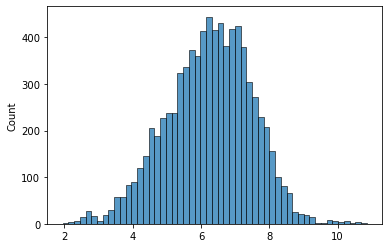

In [99]:
# kappa

sns.histplot((y[2000:,92]))

On obtient aussi une distribution symétrique 

In [134]:
moy2=np.mean(y[2000:,92])
e_type2=np.std(y[2000:,92])

print("moyenne=",moy2)
print("écart-type=",e_type2)

moyenne= 6.2398632958848586
écart-type= 1.242295553882723


Est-ce vraisemblable de penser que la loi de $\mu$ est une $\mathcal{N}(6.24,1.24)$ ?

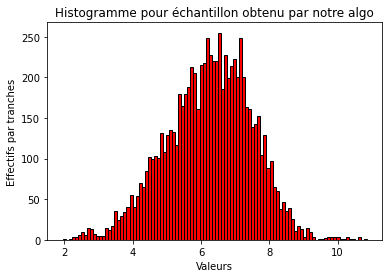

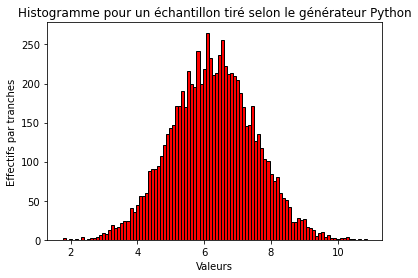

In [108]:
# Visualisation de l'adéquation à la loi normale :

X=y[2000:,92]
plt.hist(X, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title('Histogramme pour échantillon obtenu par notre algo')
plt.show()

Y=[np.random.normal(moy,e_type) for i in range(2000,10000)]
plt.hist(Y, bins = 100, color = 'red',edgecolor = 'black')
plt.xlabel('Valeurs')
plt.ylabel('Effectifs par tranches')
plt.title("Histogramme pour un échantillon tiré selon le générateur Python")
plt.show()

Ici, les deux distributions semblent assez identiques !

In [113]:
# Test de Kolmogorov-Smirnov

import scipy.stats as statis

X=y[2000:,92]
Y=[np.random.normal(moy,e_type) for i in range(2000,10000)]
D1,p1=statis.kstest(X, 'norm', (moy,e_type))
D2,p2=statis.kstest(Y, 'norm', (moy,e_type))

print("D1=",D1)
print("p-valeur_1=",p1)
print("D2=",D2)
print("p-valeur_2=",p2)

D1= 0.024557603157111862
p-valeur_1= 0.0001267280763942905
D2= 0.0066340672337293904
p-valeur_2= 0.8705492335766366


Le test de KS rejette aussi l'hypothèse selon laquelle kappa suit une loi normale

### Bilan : 
$\mu$ et $\kappa$ suivaient comme loi a priori une uniforme et une exponentielle respectivement.

Leurs distributions a posteriori apparaissent symétriques autour de leur moyenne

### Caractérisation des lois a posteriori des $(p_i)_i$

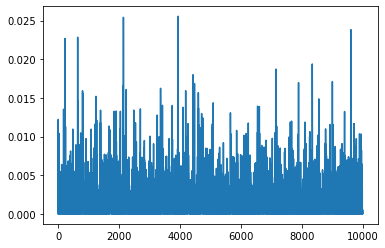

In [117]:
# ex pour l'étude 1

plt.plot(y[:,0])

# MCMC trace 

On a vu que $p_i \sim \mathcal{B}(\kappa \mu + r_i,\kappa(1-\mu)+n_i-r_i)$

On va prendre $\mu$ = 0.095 et $\kappa$ = 6 (en fait on prend la moyenne de leurs distributions à posteriori).

On compare alors la loi a posteriori des $(p_i)_i$ avec cette loi beta obtenue

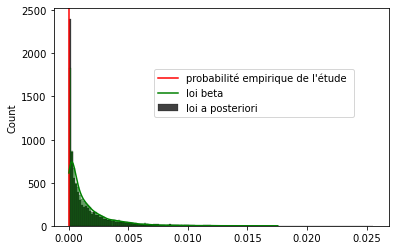

In [164]:
# etude 1

alpha=data['nb_pos'][0]+moy1*moy2
beta=data['nb_test'][0]-data['nb_pos'][0]+moy2*(1-moy1)

X=[np.random.beta(alpha,beta) for i in range(2000,10000)]

sns.histplot(y[2000:,0],color='black')
plt.axvline(data['prob'][0], color='red')
sns.histplot(X, color="green", kde=True)
plt.legend(["probabilité empirique de l'étude ",'loi beta','loi a posteriori'],loc=(0.3,0.5))

/home/guillot/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


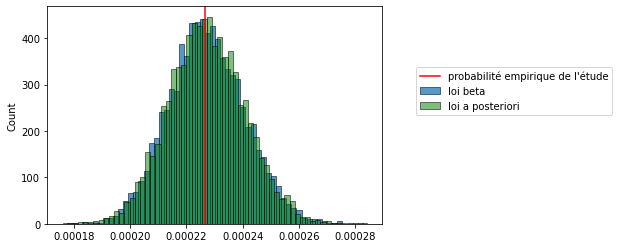

In [170]:
# etude 18 (celle où il y avait beaucoup de gens testés)

alpha=data['nb_pos'][18]+moy1*moy2
beta=data['nb_test'][18]-data['nb_pos'][18]+moy2*(1-moy1)

X=[np.random.beta(alpha,beta) for i in range(2000,10000)]

sns.histplot(y[2000:,18])
plt.axvline(data['prob'][18], color='red')
sns.histplot(X, color="green", kde=True)
plt.legend(["probabilité empirique de l'étude",'loi beta','loi a posteriori'],loc=(1.1,0.5))

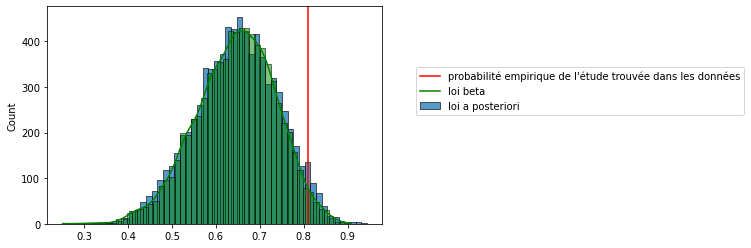

In [171]:
# etude 89 (celle où il y avait une grande part de positifs)

alpha=data['nb_pos'][89]+moy1*moy2
beta=data['nb_test'][89]-data['nb_pos'][89]+moy2*(1-moy1)

X=[np.random.beta(alpha,beta) for i in range(2000,10000)]

sns.histplot(y[2000:,89])
plt.axvline(data['prob'][89], color='red')
sns.histplot(X, color="green", kde=True)
plt.legend(["probabilité empirique de l'étude trouvée dans les données",'loi beta','loi a posteriori'],loc=(1.1,0.5))

Maintenant qu'on a simuler nos lois a posteriori, on peut faire varier $\sigma_1$ et $\sigma_2$ et analyser certains critères de convergence : 

1) trace du paramètre d'intérêt : le paramètre doit fluctuer aléatoirement ; OK, les traces ont été vues

2) histogramme des valeurs générées ne dépend pas des valeurs initiales : à examiner

3) taux d'acceptation pas trop élevés ni trop faibles

4) tracer les fonctions d'autocorrélation : celles-ci doivent décroître rapidement

5) utiliser le DSCM

### critère 2

In [192]:
N = 10000
y1 = np.zeros((N, 93))

for i in range (0,91):
    y1[0,i]=data['prob'][i]
y1[0,91]=0.1                        # valeur initiale de mu = 0.1
y1[0,92]=10


for n in tqdm(range(1, 10000)):
    y1[n] = metropolis_within_gibbs_bis(y1[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [01:03<00:00, 156.70it/s]


In [195]:
N = 10000
y2 = np.zeros((N, 93))

for i in range (0,91):
    y2[0,i]=data['prob'][i]
y2[0,91]=0.1                        # valeur initiale de mu = 0.9 
y2[0,92]=10


for n in tqdm(range(1, 10000)):
    y2[n] = metropolis_within_gibbs_bis(y2[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [01:04<00:00, 154.71it/s]


Text(0.5, 1.0, 'Distribution de la loi a posteriori de mu pour des valeurs initiales de mu différentes')

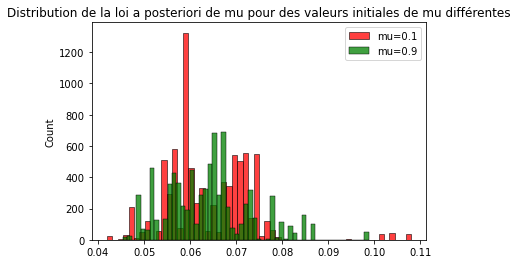

In [198]:
sns.histplot((y1[2000:,91]),color='red')
sns.histplot((y2[2000:,91]),color='green')
plt.legend(['mu=0.1','mu=0.9'])
plt.title("Distribution de la loi a posteriori de mu pour des valeurs initiales de mu différentes")

In [199]:
N = 10000
y3 = np.zeros((N, 93))

for i in range (0,91):
    y3[0,i]=data['prob'][i]
y3[0,91]=0.5                        
y3[0,92]=1                           # valeur initiale de kappa=1


for n in tqdm(range(1, 10000)):
    y3[n] = metropolis_within_gibbs_bis(y3[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [01:00<00:00, 165.28it/s]


In [200]:
N = 10000
y4 = np.zeros((N, 93))

for i in range (0,91):
    y4[0,i]=data['prob'][i]
y4[0,91]=0.5                        
y4[0,92]=10                           # valeur initiale de kappa=10


for n in tqdm(range(1, 10000)):
    y4[n] = metropolis_within_gibbs_bis(y4[n-1],sigma_1=0.5,sigma_2=2)

100%|██████████| 9999/9999 [00:57<00:00, 173.74it/s]


Text(0.5, 1.0, 'Distribution de la loi a posteriori de kappa pour des valeurs initiales de kappa différentes')

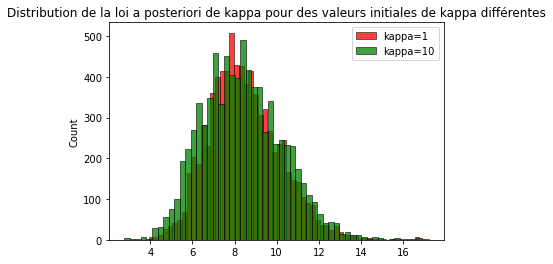

In [201]:
sns.histplot((y3[2000:,92]),color='red')
sns.histplot((y4[2000:,92]),color='green')
plt.legend(['kappa=1','kappa=10'])
plt.title("Distribution de la loi a posteriori de kappa pour des valeurs initiales de kappa différentes")

#### Bilan : critère 2 validé  globalement

### critère 3

Faisons varier sigma_1 et sigma_2 et examinons comment se comporte le taux d'acceptation : 

In [207]:
def metropolis_taux(x,sigma_1,sigma_2):
    accept_mu=0                              # à la fin, vaudra 1 si on a modifié mu à l'issue du prog, 0 sinon                         # 10 000 itérations  
    accept_kappa=0                           # idem
    
    mu=x[91]      
    kap=x[92]
    y=np.zeros(93) 
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = mu + sigma_1 * np.random.randn()      
    
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap*z)*gammar(kap*(1-z)))
        quantite_2=-91*np.log(gammar(kap*mu)*gammar(kap*(1-mu)))
        quantite_3=(kap*(z-mu))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:            
        y[91]=z
        accept_mu+=1                    # on accepte mucomme nouvelle valeur de kappa donc on ajoute 1 à accepts
    
    else:
        y[91]=mu                             
    
    
    w = kap + sigma_2 * np.random.randn()         
    
    if indicatrice2(w)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(w-kap)
        quantite_2=91*np.log(gammar(w)/(gammar(w*y[91])*gammar(w*(1-y[91]))))
        quantite_3=91*np.log(gammar(kap)/(gammar(kap*y[91])*gammar(kap*(1-y[91]))))
        quantite_4=(y[91]*(w-kap))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        quantite_5=(w-kap)*(sum([np.log(1-y[i]) for i in range(0,91)]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             
        y[92]=w
        accept_kappa+=1                 # on accepte w comme nouvelle valeur de kappa donc on ajoute 1 à accepts
    
    else:
        y[92]=kap                            

    
    return y,accept_mu,accept_kappa     # on retourne les accepts en plus de y

In [230]:
def taux_acceptation(sigma_1,sigma_2):    # fonction qui évalue nos taux d'acceptation en fonction des varianes
    N = 1000                           
    y = np.zeros((N, 93))

    for i in range (0,91):
        y[0,i]=data['prob'][i]
    y[0,91]=0.5
    y[0,92]=10
    
    nb_accepts_mu=0
    nb_accepts_kappa=0

    for n in tqdm(range(1, 1000)):
        r=metropolis_taux(y[n-1],sigma_1,sigma_2)
        y[n]=r[0]
        nb_accepts_mu+=r[1]
        nb_accepts_kappa+=r[2]
    
    return (nb_accepts_mu/999)*100,(nb_accepts_kappa/999)*100



In [231]:
taux_acceptation(0.3,2)  # un petit ex pour les écarts-types 
                         # qu'on a utilisés jusqu'à présent : sigma_1 = 0.3 et sigma_2 = 2

100%|██████████| 999/999 [00:06<00:00, 161.70it/s]


(2.1021021021021022, 44.54454454454454)

Pour ces écarts-types (utilisés jusqu'à présent), le taux d'acceptation pour mu est de 2.1% et pour kappa, il est de 44.54%

In [339]:
# faisons maintenant varier sigma_1 et sigma_2 

l_mu, l_kappa = [],[]
for sigma_1 in np.linspace(0.01,0.1,10):                # sigma_1 va de 0,01 ; 0,02 ;... jusqu'à 0.1
    for sigma_2 in np.linspace(0.1,3,30):               # sigma_2 va de 0,1 ; 0,2 ;... jusqu'à 3
        r=taux_acceptation(sigma_1,sigma_2)
        l_mu.append(r[0])
        l_kappa.append(r[1])

100%|██████████| 999/999 [00:05<00:00, 166.58it/s]


On a ainsi 300 couples différents de ($\sigma_1$,$\sigma_2$)

In [366]:
# dataframe regroupant les résultats

# liste pour sigma_1

sigma_1=[]
for k in np.linspace(0.01,0.1,10):
    sigma_1+=30*[k]
    

# liste pour sigma_2

sigma_2=[]
for k in range(0,10):
    sigma_2=np.hstack((sigma_2,np.linspace(0.1,3,30)))
    
df = pd.DataFrame({'sigma_1':sigma_1, 'sigma_2':sigma_2, 'taux_mu':l_mu, 'taux_kappa':l_kappa})
df['sigma_1']=df['sigma_1'].apply(lambda s: np.round(s,2))

In [367]:
df   # de longueur 300 pour nos 300 couples différents

,sigma_1,sigma_2,taux_mu,taux_kappa
0,0.01,0.1,56.056056,93.793794
1,0.01,0.2,60.860861,90.290290
2,0.01,0.3,58.858859,83.283283
3,0.01,0.4,57.957958,81.181181
4,0.01,0.5,56.556557,80.280280
...,...,...,...,...
295,0.10,2.6,8.608609,40.240240
296,0.10,2.7,7.607608,39.939940
297,0.10,2.8,8.808809,39.339339
298,0.10,2.9,7.907908,39.939940


In [368]:
# export au format csv

df.to_csv("/home/guillot/Documents/Robin Ensae/Matières/Simulation et Monte Carlo/tableau_var.csv",index=False)
df=pd.read_csv("/home/guillot/Documents/Robin Ensae/Matières/Simulation et Monte Carlo/tableau_var.csv")

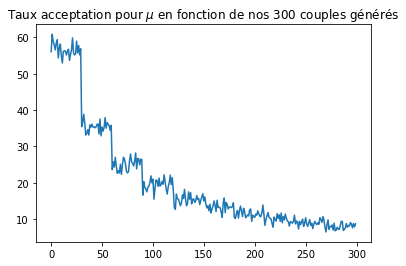

In [369]:
# taux d'acceptation pour mu selon les 300 couples


plt.title('Taux acceptation pour $\mu$ en fonction de nos 300 couples générés')
plt.plot(l_mu)

Le taux d'acceptation est très variable, mais doit être choisi plutot de l'ordre de 40/50 \%

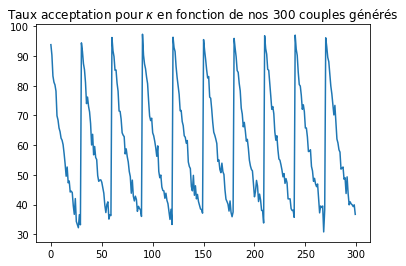

In [370]:
# taux d'acceptation pour kappa selon les 300 couples


plt.title('Taux acceptation pour $\kappa$ en fonction de nos 300 couples générés')
plt.plot(l_kappa)

De cette forme périodique, on déduit que le taux d'acceptation pour $\kappa$ varie peu avec la première variance $\sigma_1$.
Fixons $\sigma_1$(par exemple =0.05 mais cela n'a pas d'importance) : 

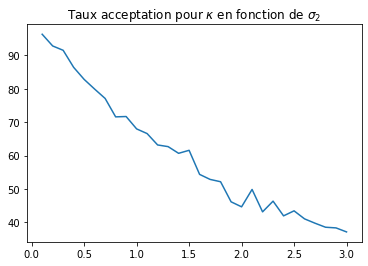

In [371]:
plt.title('Taux acceptation pour $\kappa$ en fonction de $\sigma_2$')

plt.plot(np.linspace(0.1,3,30),df[df['sigma_1']==0.05]['taux_kappa'])   


Un taux d'acceptation de l'ordre de 40 à 50 \% est bien

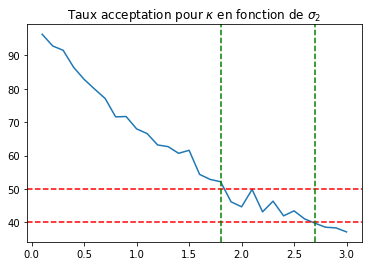

In [373]:
plt.title('Taux acceptation pour $\kappa$ en fonction de $\sigma_2$')

plt.plot(np.linspace(0.1,3,30),df[df['sigma_1']==0.05]['taux_kappa'])
plt.axhline(40, color='red',linestyle='--')
plt.axhline(50, color='red',linestyle='--')
plt.axvline(1.8, color='green',linestyle='--')
plt.axvline(2.7, color='green',linestyle='--')

On voit que pour $\sigma_2 \in [1,8;2,7]$, on a un bon taux d'acceptation. La valeur de $\sigma_2 = 2$ qu'on a choisi depuis le début est donc adaptée.

Une fois $\sigma_2$ choisie, quelle valeur prendre pour $\sigma_1$ ?
Représentons le taux d'acceptation en fonction de $\sigma_1$ (cette fois on a fixé l'autre variance à 2) :

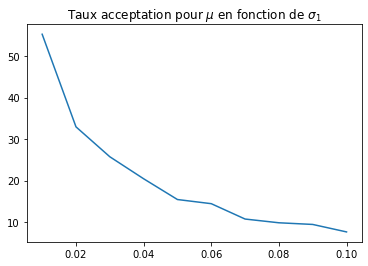

In [374]:
plt.title('Taux acceptation pour $\mu$ en fonction de $\sigma_1$')

plt.plot(np.linspace(0.01,0.1,10),df[df['sigma_2']==2]['taux_mu'])

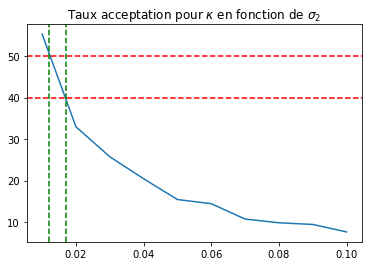

In [380]:
plt.title('Taux acceptation pour $\kappa$ en fonction de $\sigma_2$')

plt.plot(np.linspace(0.01,0.1,10),df[df['sigma_2']==2]['taux_mu'])
plt.axhline(40, color='red',linestyle='--')
plt.axhline(50, color='red',linestyle='--')
plt.axvline(0.012, color='green',linestyle='--')
plt.axvline(0.017, color='green',linestyle='--')

On voit que pour $\sigma_1 \in [0.012;0.017]$, on a un bon taux d'acceptation.

Bilan : critère 3 ok ! 

$\sigma_2 \in [1,8;2,7]$ et $\sigma_1 \in [0.012;0.017]$ sont de bons paramètres

### critère 4

Tracons les fonction d'autocorrélations pour $\mu$ et $\kappa$ et vérifions qu'elles décroissent rapidement : 

In [646]:
N = 10000
y = np.zeros((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]
y[0,91]=0.5                        
y[0,92]=10                           


for n in tqdm(range(1, 10000)):
    y3[n] = metropolis_within_gibbs_bis(y3[n-1],sigma_1=0.015,sigma_2=2)    # bons paramètres comme vu au-dessus

100%|██████████| 9999/9999 [00:52<00:00, 190.07it/s]


Text(0.5, 1.0, "['p89']")

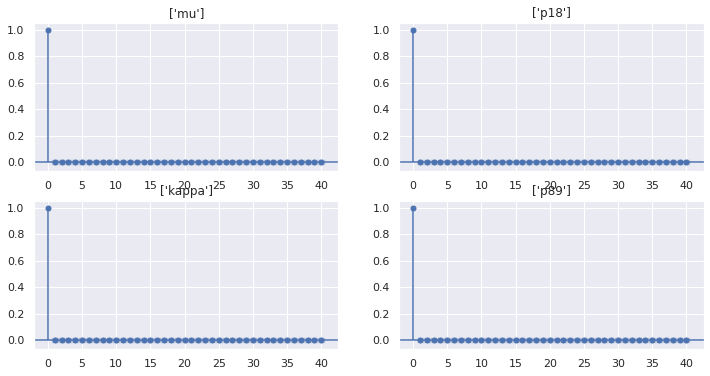

In [667]:
fig,ax=plt.subplots(2,2,figsize=(12,6))
plot_acf(y[:,91],ax=ax[0,0])
ax[0,0].set_title(['mu'])
plot_acf(y[:,92],ax=ax[1,0])
ax[1,0].set_title(['kappa'])
plot_acf(y[:,18],ax=ax[0,1])
ax[0,1].set_title(['p18'])
plot_acf(y[:,89],ax=ax[1,1])
ax[1,1].set_title(['p89'])

Bilan : critère 4 ok ! Les autocorrélations décroissent très rapidement !

### critère 5

DSCM = $\frac{1}{N}\sum_{j=0}^{N-1}(x_j-x_{j+1})^2$

Il faut maximiser cette quantité ; on va voir pour quel couple de variances cette quantité est la plus élevée

In [393]:
def metropolis_DSCM(x,sigma_1,sigma_2):
    DSCM_mu=0                                     # initialisation des DSCM à 0                                                     
    DSCM_kappa=0                           
    
    mu=x[91]      
    kap=x[92]
    y=np.zeros(93) 
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = mu + sigma_1 * np.random.randn()      
    
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap*z)*gammar(kap*(1-z)))
        quantite_2=-91*np.log(gammar(kap*mu)*gammar(kap*(1-mu)))
        quantite_3=(kap*(z-mu))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:            
        y[91]=z
        DSCM_mu+=(y[91]-mu)**2         # si on a une nouvelle valeur, la DSCM augmente, sinon elle reste à 0
    
    else:
        y[91]=mu                             
    
    
    w = kap + sigma_2 * np.random.randn()         
    
    if indicatrice2(w)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(w-kap)
        quantite_2=91*np.log(gammar(w)/(gammar(w*y[91])*gammar(w*(1-y[91]))))
        quantite_3=91*np.log(gammar(kap)/(gammar(kap*y[91])*gammar(kap*(1-y[91]))))
        quantite_4=(y[91]*(w-kap))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        quantite_5=(w-kap)*(sum([np.log(1-y[i]) for i in range(0,91)]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             
        y[92]=w
        DSCM_kappa+=(y[92]-kap)**2          # si on a une nouvelle valeur, la DSCM augmente, sinon elle reste à 0 
    
    else:
        y[92]=kap                            

    
    return y,DSCM_mu,DSCM_kappa     # on retourne les DSCM en plus de y

In [395]:
def DSCM(sigma_1,sigma_2):    # fonction qui évalue nos DSCM en fonction des variances
    N = 1000                           
    y = np.zeros((N, 93))

    for i in range (0,91):
        y[0,i]=data['prob'][i]
    y[0,91]=0.5
    y[0,92]=10
    
    DSCM_mu=0
    DSCM_kappa=0

    for n in tqdm(range(1, 1000)):
        r=metropolis_taux(y[n-1],sigma_1,sigma_2)
        y[n]=r[0]
        DSCM_mu+=r[1]
        DSCM_kappa+=r[2]
    
    return DSCM_mu/1000,DSCM_kappa/1000

In [396]:
# faisons maintenant varier sigma_1 et sigma_2 

l_mu, l_kappa = [],[]
for sigma_1 in np.linspace(0.01,0.1,10):                # sigma_1 va de 0,01 ; 0,02 ;... jusqu'à 0.1
    for sigma_2 in np.linspace(0.1,3,30):               # sigma_2 va de 0,1 ; 0,2 ;... jusqu'à 3
        r=DSCM(sigma_1,sigma_2)
        l_mu.append(r[0])
        l_kappa.append(r[1])

100%|██████████| 999/999 [00:07<00:00, 142.19it/s]


In [397]:
# dataframe regroupant les résultats

# liste pour sigma_1

sigma_1=[]
for k in np.linspace(0.01,0.1,10):
    sigma_1+=30*[k]
    

# liste pour sigma_2

sigma_2=[]
for k in range(0,10):
    sigma_2=np.hstack((sigma_2,np.linspace(0.1,3,30)))
    
dg = pd.DataFrame({'sigma_1':sigma_1, 'sigma_2':sigma_2, 'DSCM_mu':l_mu, 'DSCM_kappa':l_kappa})
dg['sigma_1']=dg['sigma_1'].apply(lambda s: np.round(s,2))

In [398]:
dg

,sigma_1,sigma_2,DSCM_mu,DSCM_kappa
0,0.01,0.1,0.587,0.914
1,0.01,0.2,0.529,0.908
2,0.01,0.3,0.539,0.856
3,0.01,0.4,0.565,0.777
4,0.01,0.5,0.561,0.759
...,...,...,...,...
295,0.10,2.6,0.083,0.373
296,0.10,2.7,0.083,0.398
297,0.10,2.8,0.085,0.383
298,0.10,2.9,0.066,0.386


In [399]:
# export au format csv

dg.to_csv("/home/guillot/Documents/Robin Ensae/Matières/Simulation et Monte Carlo/tableau_DSCM.csv",index=False)
dg=pd.read_csv("/home/guillot/Documents/Robin Ensae/Matières/Simulation et Monte Carlo/tableau_DSCM.csv")

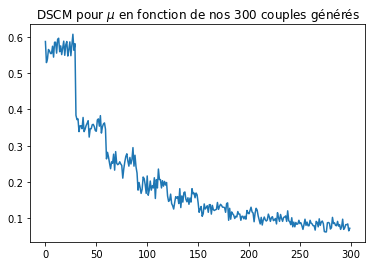

In [400]:
# DSCM pour mu selon les 300 couples


plt.title('DSCM pour $\mu$ en fonction de nos 300 couples générés')
plt.plot(l_mu)

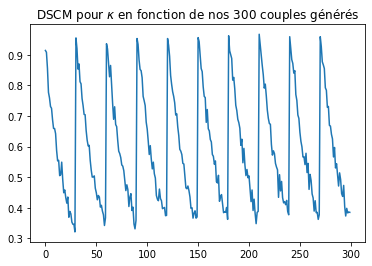

In [401]:
# DSCM pour kappa selon les 300 couples


plt.title('DSCM pour $\kappa$ en fonction de nos 300 couples générés')
plt.plot(l_kappa)

On obtient des graphes assez identiques aux taux d'acceptation.

En pratique, on utilise plutôt le critère DSCM que le taux d'acceptation

#### Rq générale : on peut utiliser aussi une loi uniforme dans le Metropolis : 

In [176]:
def uniforme(a,b):
    return(a+(b-a)*rd.random())

In [177]:
def metropolis_within_gibbs_ter(x,eps1,eps2):
    mu=x[91]      
    kap=x[92]
    y=np.zeros(93)  
    
    for i in range(0,91):
        a = mu*kap+data['nb_pos'][i]
        b = data['nb_test'][i]-data['nb_pos'][i]+kap*(1-mu)
        y[i]=np.random.beta(a,b)
    
    z = uniforme(mu-eps1,mu+eps1)      # proposition pour la prochaine valeur de mu : loi uniforme centrée sur  
                                       # la valeur précédente et de support dépendant de eps1
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap*z)*gammar(kap*(1-z)))
        quantite_2=-91*np.log(gammar(kap*mu)*gammar(kap*(1-mu)))
        quantite_3=(kap*(z-mu))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:             
        y[91]=z
    
    else:
        y[91]=mu                            
    
    
    w = uniforme(kap-eps2,kap+eps2)        # proposition pour la prochaine valeur de kappa : loi unifrome centrée
                                           # sur la valeur précédente et de support dépendant de eps2
    if indicatrice2(w)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(w-kap)
        quantite_2=91*np.log(gammar(w)/(gammar(w*y[91])*gammar(w*(1-y[91]))))
        quantite_3=91*np.log(gammar(kap)/(gammar(kap*y[91])*gammar(kap*(1-y[91]))))
        quantite_4=(y[91]*(w-kap))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91)]))
        quantite_5=(w-kap)*(sum([np.log(1-y[i]) for i in range(0,91)]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             
        y[92]=w
    
    else:
        y[92]=kap                            

    
    return y      

In [181]:
N = 10000                          # 10 000 itérations 
y = np.zeros((N, 93))

for i in range (0,91):
    y[0,i]=data['prob'][i]
y[0,91]=0.5
y[0,92]=10

for n in tqdm(range(1, 10000)):
    y[n] = metropolis_within_gibbs_ter(y[n-1],eps1=0.3,eps2=1)

100%|██████████| 9999/9999 [01:03<00:00, 157.25it/s]


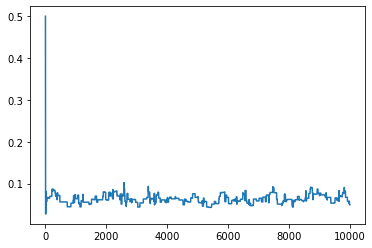

In [182]:
plt.plot(y[:,91])

# MCMC trace pour mu

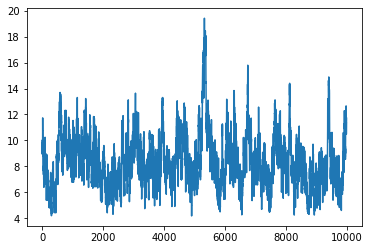

In [183]:
plt.plot(y[:,92])

# MCMC trace pour kappa

<AxesSubplot:ylabel='Count'>

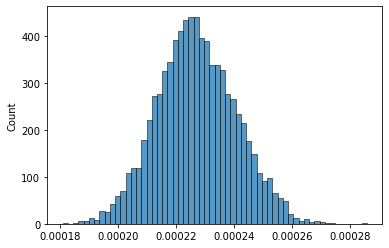

In [185]:
sns.histplot(y[2000:,18])

# MCMC trace pour probabilité de l'étude 18

On obtient les mêmes résultats

## Question 3 : 

Cas de figure où il y a deux sous-populations d’étude. 

On part alors du même modèle que dans la situation 2, mais cette fois $p_i$ suit un mélange de deux lois Beta.

Comme on ne connaît pas l’attribution des observations à l’une des lois Beta,on crée une variable latente $w_i \sim \mathcal{B}(\eta)$ qui attribue la probabilité a posteriori de chaque observation d’être dans une des deux populations.

On a ainsi : $p_i \sim w_i \times \mathcal{B}({\mu_1,\kappa_1})+ (1-w_i)\times \mathcal{B}({\mu_0,\kappa_0})$

Ici, on ne détaille pas les calculs mais le principe reste le même : 

Ainsi, à chaque étape $n$ : 

- 1 : on actualise les $(w_i)_i$, ce qui va séparer à l'étape n notre échnatillon d'études en deux sous-populations 

- 2 : pour toutes les études $i$ dont on a obtenu $w_i$=1, algorithme de Metropolis within Gibbs de paramètres $\mu_0$ et $\kappa_0$, ie on fait : 
 -  actualisation des $(p_i)_i$ concernés
 -  actualisation de $\mu_0$
 -  actualisation de $\kappa_0$

- 3 : pour toutes les études $i$ dont on a obtenu $w_i$=1, algorithme de Metropolis within Gibbs de paramètres $\mu_1$ et $\kappa_1$, ie on fait : 
 -  actualisation des $(p_i)_i$ concernés
 -  actualisation de $\mu_1$
 -  actualisation de $\kappa_1$
               

In [559]:
# initialisation de notre vecteur y 
# qui contiendra les valeurs successives de nos 186 paramètres (les 91 p_i + les 91 w_i +mu0 + kap0 + mu1 + kap1 )
                   

N = 400
y = np.zeros((N, 186))

for i in range (0,91):
    y[0,i]=data['prob'][i]           # on prend les probas empiriques comme probas initiales
    
for i in range(91,182):
    y[0,i]=np.random.binomial(1,0.5)   # on prend des valeurs au hasard (0 ou 1) comme w_i initiales
    
y[0,182]=0.5         # valeur initiale pour mu0 car mu0 suit une uniforme sur [0,1]
y[0,183]=10          # valeur initiale pour kappa0 car kappa0 suit une exp(0.1) donc est de moyenne 10
y[0,184]=0.5         # valeur initiale pour mu1 
y[0,185]=10          # valeur initiale pour kappa1


In [557]:
def metropolis_within_gibbs_melange(x,sigma_mu0,sigma_kap0,sigma_mu1,sigma_kap1,eta):
    
    mu0=x[182]      # valeur précédente de mu0
    kap0=x[183]     # valeur précédente de kappa0
    
    mu1=x[184]      # valeur précédente de mu1
    kap1=x[185]     # valeur précédente de kappa1
    
    y=np.zeros(186)  # initialisation d'un vecteur y qui contiendra les valeurs à l'étape suivante
    
    
    ## changement des w_i
    
    for i in range(0,91):
        if x[i]==0:
            r = 0.5 # cas particulier où il y aura autant de chance pour cette étude que w_i vaille 0 ou 1
            seuil=np.log(r)  #on prend le log du seuil
        else:
            A=np.log(eta*gammar(kap1))-np.log(gammar(kap1*mu1))-np.log(gammar(kap1*(1-mu1)))+(kap1*mu1-1)*np.log(x[i])+(kap1*(1-mu1)-1)*np.log(1-x[i])
            
            B=np.log((eta*gammar(kap1)/(gammar(kap1*mu1)*gammar(kap1*(1-mu1))))*((x[i])**(kap1*mu1-1))*((1-x[i])**(kap1*(1-mu1)-1))+(1-eta)*((gammar(kap0)/(gammar(kap0*mu0)*gammar(kap0*(1-mu0))))*((x[i])**(kap0*mu0-1))*((1-x[i])**(kap0*(1-mu0)-1))))
        
            seuil=A-B
        
        if np.log(np.random.rand()) < seuil:       # w_i =1
            y[91+i]=1
            
        else:
            y[91+i]=0
        
    ## changement des p_i
    
    for i in range(0,91):
        if y[91+i]==1:                                      # on tombe dans la premiere loi beta
            a = mu1*kap1+data['nb_pos'][i]
            b = data['nb_test'][i]-data['nb_pos'][i]+kap1*(1-mu1)
            y[i]=np.random.beta(a,b)
            
        else:                                               # on tombe dans l'autre loi beta
            a = mu0*kap0+data['nb_pos'][i]
            b = data['nb_test'][i]-data['nb_pos'][i]+kap0*(1-mu0)
            y[i]=np.random.beta(a,b)
    
    
    ## changement des mu0
    
    z = mu0 + sigma_mu0 * np.random.randn()       # proposition pour la prochaine valeur de mu0 
    
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*(np.log(gammar(kap0*z))+np.log(gammar(kap0*(1-z))))
        quantite_2=-91*(np.log(gammar(kap0*mu0)*gammar(kap0*(1-mu0))))
        quantite_3=(kap0*(z-mu0))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91) if y[91+i]==0]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:             # on accepte z comme nouvelle valeur de mu0
        y[182]=z
    
    else:
        y[182]=mu0                             # on garde l'ancienne valeur de mu0
        
    
    ## changement des mu1
    
    z = mu1+ sigma_mu1 * np.random.randn()       # proposition pour la prochaine valeur de mu1 
    
    if indicatrice1(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-91*np.log(gammar(kap1*z)*gammar(kap1*(1-z)))
        quantite_2=-91*np.log(gammar(kap1*mu1)*gammar(kap1*(1-mu1)))
        quantite_3=(kap1*(z-mu1))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91) if y[91+i]==1]))
        seuil=min(0,quantite_1+quantite_3-quantite_2)
                                                                   
    if np.log(np.random.rand()) < seuil:             # on accepte z comme nouvelle valeur de mu1
        y[184]=z
    
    else:
        y[184]=mu1                             # on garde l'ancienne valeur de mu1
    
    
    ## changement des kappa0
    
    z = kap0 + sigma_kap0 * np.random.randn()         # proposition pour la prochaine valeur de kappa0
    
    if indicatrice2(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(z-kap0)
        quantite_2=91*np.log(gammar(z)/(gammar(z*y[182])*gammar(z*(1-y[182]))))
        quantite_3=91*np.log(gammar(kap0)/(gammar(kap0*y[182])*gammar(kap0*(1-y[182]))))
        quantite_4=(y[182]*(z-kap0))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91) if y[91+i]==0]))
        quantite_5=(z-kap0)*(sum([np.log(1-y[i]) for i in range(0,91) if y[91+i]==0]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             # on accepte z comme nouvelle valeur de kappa0
        y[183]=z
    
    else:
        y[183]=kap0                            # on garde l'ancienne valeur de kappa0  
        
    
    ## changement des kappa1
    
    z = kap0 + sigma_kap1 * np.random.randn()         # proposition pour la prochaine valeur de kappa1
    
    if indicatrice2(z)==0:
        seuil=-np.inf
    else:
        quantite_1=-0.1*(z-kap1)
        quantite_2=91*np.log(gammar(z)/(gammar(z*y[184])*gammar(z*(1-y[184]))))
        quantite_3=91*np.log(gammar(kap1)/(gammar(kap1*y[184])*gammar(kap0*(1-y[184]))))
        quantite_4=(y[184]*(z-kap1))*(sum([np.log(y[i]/(1-y[i])) for i in range(0,91) if y[91+i]==1]))
        quantite_5=(z-kap1)*(sum([np.log(1-y[i]) for i in range(0,91) if y[91+i]==1]))
        seuil=min(0,(quantite_1+quantite_2+quantite_4+quantite_5)-quantite_3)
        
    if np.log(np.random.rand()) < seuil:             # on accepte z comme nouvelle valeur de kappa1
        y[185]=z
    
    else:
        y[185]=kap1                            # on garde l'ancienne valeur de kappa1 

    
    return y      # on retourne le vecteur des nouvelles valeurs

In [560]:
# generate chain

for n in tqdm(range(1, 400)):
    y[n] = metropolis_within_gibbs_melange(y[n-1],sigma_mu0=0.015,sigma_kap0=2,sigma_mu1=0.015,sigma_kap1=2,eta=0.5)

100%|██████████| 399/399 [00:28<00:00, 14.18it/s]


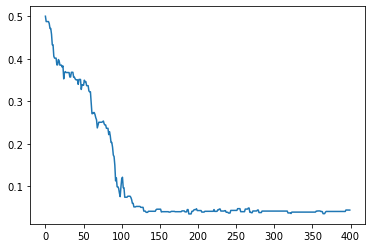

In [561]:
plt.plot(y[:,182])

# MCMC trace pour mu0

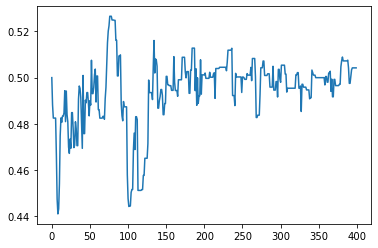

In [562]:
plt.plot(y[:,184])

# MCMC trace pour mu1

A partir de la 150ème itération, on a bien convergence de l'algo

#### Nombre d'études dans les populations 0 et 1 : 

In [589]:
list_propor_1=[(y[i,91:182].sum()) for i in range(0,300)]
list_propor_0=[(91-y[i,91:182].sum()) for i in range(0,300)]

Text(0.5, 1.0, 'Répartition des études dans les 2 populations')

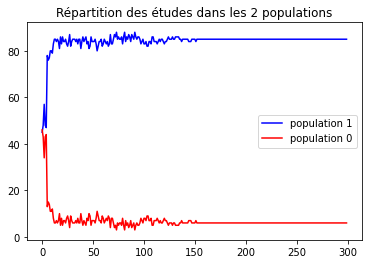

In [592]:
plt.plot(list_propor_0,color='blue',label='population 1')
plt.plot(list_propor_1,color='red',label='population 0')
plt.legend()
plt.title("Répartition des études dans les 2 populations")

On remarque qu'à partir de la 150ème itération (qui correspond à notre région de burn in mises en évidence sur les traces de mu0 et mu1 précédentes), les proportions dans chaque population se stabilisent.

##### A l'état stable, quelles études demeurent dans la population 1 (minoritaire) ?

In [593]:
pop_1=[]
for j in range(0,91):
    if y[299,91+j]==1:
        pop_1.append(j)

In [594]:
pop_1

[83, 85, 86, 87, 88, 89]

In [600]:
data.index[1]

1

In [605]:
# création de la variable population valant 1 ou 0 selon l'étude

data['population']=0 # initialisation

for k in range(0,91):
    if k in {83,85,86,87,88,89}:
        data['population'].iloc[k]=1

/home/guillot/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


La population 1 est constituée des 83,85,86,87 et 89. Est-ce cohérent ? 
Suspens...Réponse avec le graphique ci-dessous : 

### graphique bilan 

<AxesSubplot:xlabel='prob', ylabel='Count'>

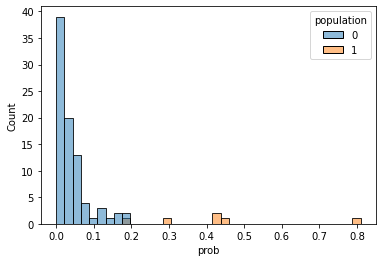

In [625]:
sns.histplot(data=data,x='prob',hue='population')

OUI c'est cohérent ! Notre algo a réussi à discriminer deux types d'études (//clustering en ML) : celles pour lesquelles la prévalence de la listeria apparait empiriquement forte et qui vont suivre une certaine loi

Une deuxième population, majoritaire, représentée en bleu, où les études affichent des taux de positivité plus faibles, et qui vont suivre une autre loi.

Ce modèle apparait le plus réaliste des trois, car il prend en compte les différences notables du taux de prévalence au listeria affichés par chaque pays, ici en les séparant en deux groupes distincts, et donc en leur imputant deux lois a posteriori différentes

Rq : Ces taux de prévalence entre pays peuvent venir de multiples paramètres (méthodologie de calcul du pays en question, climat,...)

In [ ]:
## fin !!